Step 0: Importing usual libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns # for data visualiztions


Step 1: Getting the Data

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

#print(y)
 
# Create dataframe using iris.data
df_data = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df_target = pd.DataFrame(data=iris.target, columns=["class"])
df = df_data
# Append class / label data
df["class"] = iris.target
df["class"] = df["class"].replace([0,1,2],["Iris Setosa","Iris Versicolour","Iris Virginica"])


Step 2: Data Manipulation and Visualization

In [4]:
# Print the data and check for yourself
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris Setosa
1,4.9,3.0,1.4,0.2,Iris Setosa
2,4.7,3.2,1.3,0.2,Iris Setosa
3,4.6,3.1,1.5,0.2,Iris Setosa
4,5.0,3.6,1.4,0.2,Iris Setosa


In [5]:
df.shape

(150, 5)

In [6]:
df_target.shape

(150, 1)

In [7]:
df_data.shape

(150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


So the given data set doesn't have any NAN or null values

In [9]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
class            3
dtype: int64

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


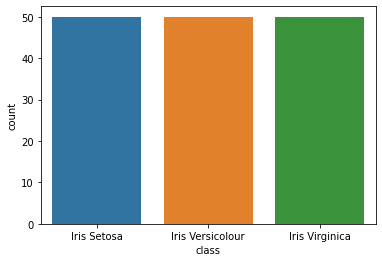

In [11]:
sns.countplot(x="class", data = df)

All three classes are equally distributed

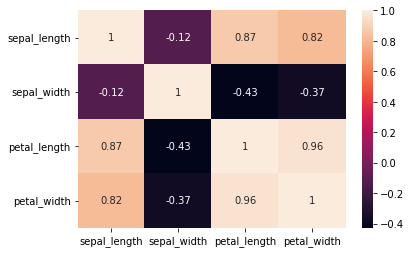

In [12]:
sns.heatmap(df.corr(), annot=True)

**Observation** above heat map represents the correlation between all the four categories

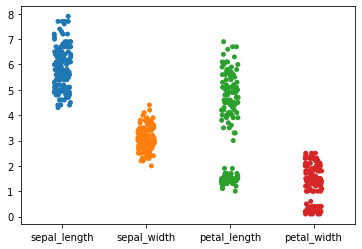

In [13]:
sns.stripplot(data = df)

**Observation** the above strip plot shows the spread of each categorical data points  

STEP 3: Divide dataset into Train/Test

In [14]:
X_train, X_test = train_test_split(df, test_size=0.2)
y_train = X_train["class"];
X_train = X_train.drop(["class"],axis=1)
y_test = X_test["class"];
X_test = X_test.drop(["class"],axis=1)

STEP 4: Prepare data for ML, Data cleaning, Standardization

Converting class categorical value into numerical value

In [15]:
y_train = y_train.replace(["Iris Setosa","Iris Versicolour","Iris Virginica"],[0,1,2])

In [16]:
y_test = y_test.replace(["Iris Setosa","Iris Versicolour","Iris Virginica"],[0,1,2])

Checking if dataset has any NAN values

In [17]:
X_train.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [18]:
y_train.isnull().sum()

0

In [19]:
X_test.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [20]:
y_test.isnull().sum()

0

Text(0.5, 1.0, 'Missing values')

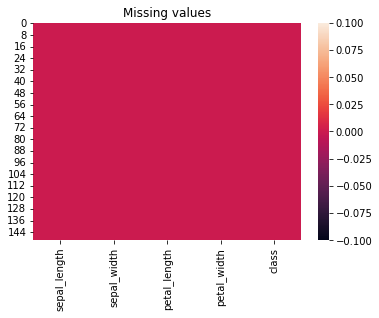

In [36]:
sns.heatmap(df.isnull()).set_title("Missing values")

Since there is no NAN values and data is clean. We can continue to next steps

Data is already converted from array to pandas framework

**SVM**

Train on Linear Support vector Machine

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


Compute Error using RMSE

In [22]:
MeanSquareError = np.square(np.subtract(y_test,y_pred)).mean() 
print(MeanSquareError)
RootMeanSquareError = math.sqrt(MeanSquareError)
print("Root Mean Square Error:\n")
print(RootMeanSquareError)

0.0
Root Mean Square Error:

0.0


Compute with RBF kernel functions 

In [23]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9666666666666667


Tune SVM hyper parameters by using GridSearchCV with cross validation

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
# find the best score
grid.best_score_

0.9666666666666668

In [26]:
grid.best_params_

{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

In [27]:
#using best params on svc 
svc = SVC(C= 0.1, degree= 2, gamma= 1, kernel= 'poly')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)


Parameters values for **C = 0.1 and gamma = 1**

Accuracy score for the model

In [28]:
print(accuracy_score(y_test,y_pred))

1.0


**KNN**

Training dataset using Neighbor with neighbors = 9

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
knn = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
y_predict= knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.9666666666666667


Tuning the number of k using RandomizedSearchCV

In [31]:
#Define the parameter values that should be searched
k_range=list(range(1,31))
options=['uniform', 'distance']

param_grid = dict(n_neighbors=k_range, weights=options)
param_grid

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'weights': ['uniform', 'distance']}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

knn=KNeighborsClassifier()
randomizedSearchCV = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)
randomizedSearchCV.fit(X_train, y_train)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
  

In [33]:
randomizedSearchCV.best_score_

0.975

In [34]:
randomizedSearchCV.best_params_

{'n_neighbors': 16, 'weights': 'distance'}

Accuracy score for the model

In [35]:
knn = KNeighborsClassifier(n_neighbors = 10,weights='distance').fit(X_train,y_train)
y_predict= knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0
